In [6]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [3]:
fpath = "../_data/train - bank-campaign-data.csv"
df = pd.read_csv(fpath)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,id_var
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,65790
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,55643
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,66189
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,70807
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,42625


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37084 non-null  int64  
 1   job             37084 non-null  object 
 2   marital         37084 non-null  object 
 3   education       37084 non-null  object 
 4   default         37084 non-null  object 
 5   housing         37084 non-null  object 
 6   loan            37084 non-null  object 
 7   contact         37084 non-null  object 
 8   month           37084 non-null  object 
 9   day_of_week     37084 non-null  object 
 10  duration        37084 non-null  int64  
 11  campaign        37084 non-null  int64  
 12  pdays           37084 non-null  int64  
 13  previous        37084 non-null  int64  
 14  poutcome        37084 non-null  object 
 15  emp.var.rate    37084 non-null  float64
 16  cons.price.idx  37084 non-null  float64
 17  cons.conf.idx   37084 non-null 

In [14]:
df = (df
.assign(success=lambda x: x['y'].map({'yes': 1, 'no': 0}), 
        job=lambda x: x['job'].astype('category'),
        marital=lambda x: x['marital'].astype('category'),
        education=lambda x: x['education'].astype('category'),
        default=lambda x: x['default'].astype('category'),
        housing=lambda x: x['housing'].astype('category'),)
)

In [23]:
df["campaign"].value_counts()

1     15883
2      9532
3      4777
4      2389
5      1441
6       873
7       580
8       360
9       260
10      196
11      165
12      118
13       88
14       62
17       49
16       45
15       41
18       32
20       28
19       25
21       24
24       14
23       14
22       14
27        9
28        8
29        8
26        7
30        6
25        6
31        6
33        4
35        4
32        4
34        3
40        2
43        2
37        1
39        1
41        1
42        1
56        1
Name: campaign, dtype: int64

In [15]:
smf.logit("success ~ campaign", data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.350569
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                37084
Model:                          Logit   Df Residuals:                    37082
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                0.008891
Time:                        10:06:53   Log-Likelihood:                -13000.
converged:                       True   LL-Null:                       -13117.
Covariance Type:            nonrobust   LLR p-value:                 1.163e-52
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7645      0.026    -67.896      0.000      -1.815      -1.714
campaign      -0.1273      0.010    -13.142      0.000      -0.146      -0.108
==============================================================================
"""

In [1]:
import random
import pandas as pd

# Create a list of product names
products = ['Apple', 'Banana', 'Orange']

# Assign a price to each product
prices = {'Apple': 1.99, 'Banana': 0.79, 'Orange': 2.49}

# Create a list of transaction data
data = []
for i in range(10):
    transaction = {
        'product': random.choice(products),
        'price': prices[random.choice(products)],
        'quantity': random.randint(1, 10),
        'date': '2022-01-0' + str(i+1),
        'total': 0
    }
    transaction['total'] = round(transaction['price'] * transaction['quantity'], 2)
    data.append(transaction)

# Create a DataFrame from the transaction data
df = pd.DataFrame(data)
df.drop(columns=['total'], inplace=True)

In [2]:
df.to_excel("sales.xlsx", index=False)

In [3]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialize the Faker object
fake = Faker()

# Define the number of transactions to simulate
num_transactions = 10000

# Create empty lists to store the data
dates = []
customer_age = []
products = []
prices = []
quantities = []

# Define the product list
product_list = ["Product A", "Product B", "Product C", "Product D", "Product E", "Product F", "Product G", "Product H", "Product I", "Product J"]

# Define the price list
price_list = [10,20,30,40,50,60,70,80,90,100]

# Define the ratio of older to younger customers
old_customer_ratio = 0.2
young_customer_ratio = 0.8

# Define the average purchase value for older and younger customers
old_customer_avg_purchase = 50
young_customer_avg_purchase = 20

# Simulate the data
for _ in range(num_transactions):
    # Assign a date within the last year
    dates.append(fake.date_between(start_date='-1y', end_date='today'))
    # Assign a random age to the customer
    customer_age.append(fake.random_int(min=18, max=80))
    # Assign a random product to the customer
    products.append(np.random.choice(product_list))
    # Assign the corresponding price to the product
    prices.append(price_list[product_list.index(products[-1])])
    # Assign a random quantity to the customer
    if customer_age[_] < 40:
        # Assign a quantity based on the young customer average purchase value
        quantities.append(np.random.normal(young_customer_avg_purchase / prices[-1],1))
    else:
        # Assign a quantity based on the old customer average purchase value
        quantities.append(np.random.normal(old_customer_avg_purchase / prices[-1],1))

transactions_df = pd.DataFrame({'date': dates, 'customer_age': customer_age, 'product': products, 'price': prices, 'quantity': quantities})
transactions_df["quantity"] = transactions_df["quantity"].apply(lambda x: x if x>0 else 0)
transactions_df.head()

,date,customer_age,product,price,quantity
0,2022-10-02,28,Product H,80,1.558574
1,2022-04-23,47,Product A,10,5.244605
2,2022-11-16,29,Product D,40,0.570323
3,2022-08-17,75,Product G,70,1.689713
4,2022-03-31,54,Product B,20,2.513816


## Simulation - Einführende Fallstudie

Datensatz:

- alte und junge Kunden 
- über die Zeit hat sich Anteil an jungen Kunden erhöht
- Umsatz rückläufig, weil junge Kunden weniger ausgeben, d.h. andere Produkte und weniger Umsatz pro Kunde

In [1]:
import pandas as pd # Data manipulation
import numpy as np
import scipy.stats as stats # Statistical analysis; mainly distributions
from faker import Faker # Generate fake data
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [5]:
def perc_young_trend(start_perc: float, end_perc: float, n: int) -> np.ndarray:
    """
    Simulate percentage of young customers trend over time
    
    Args:
        start_perc (float): percentage of young customers at the start of the simulation
        end_perc (float): percentage of young customers at the end of the simulation
        n (int): number of time steps to simulate

    Returns:
        np.ndarray: percentage of young customers trend over time
    """
    # create a time series trend
    trend = np.linspace(start_perc, end_perc, n)
    # add some noise to the trend
    noise = np.random.normal(0, 0.06, n)

    perc = trend + noise

    # Ensure that perc is between 0 and 1
    perc = np.clip(perc, 0.01, 0.99)

    return perc

In [6]:
np.random.seed(10)

n_transactions = 10_000 # Number of transactions to simulate
start_perc_young = 0.2 # Percentage of young customers at the start of the simulation
end_perc_young = 0.7 # Percentage of young customers at the end of the simulation

# Define parameters for the young and old customers (average price, average quantity, etc.)
paras_customer = {"avg_price": [19, 39], "avg_quantity": [2, 4], "age": [22, 50]}
dist = stats.poisson # Distribution to use for the price and quantity and the age

# Fake data generator to generate
# - fake customer names
# - fake customer ages
fake = Faker(locale="de-DE")
perc_young = perc_young_trend(start_perc_young, end_perc_young, n_transactions)

data = {"customer_age": [], "customer_name": [], "customer_payment_method": [], "price": [], "quantity": [],  "wochentag": []}
for i in range(0, n_transactions):
    customer_type = np.random.choice([0, 1], p=[perc_young[i], 1-perc_young[i]])
    customer_age = dist.rvs(paras_customer["age"][customer_type]) + 7
    customer_name = fake.name()
    customer_payment_method = np.random.choice(["Kreditkarte", "Bar", "EC-Karte"])
    wochentag = np.random.choice(["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag"], p=[0.15, 0.15, 0.15, 0.15, 0.15, 0.25])
    
    # Minimum price is 1
    price = dist.rvs(paras_customer["avg_price"][customer_type]) + 1.99
    
    # Minimum quantity is 1
    quantity = dist.rvs(paras_customer["avg_quantity"][customer_type]) + 1
    total = price * quantity

    data["customer_age"].append(customer_age)
    data["customer_name"].append(fake.name())
    data["customer_payment_method"].append(customer_payment_method)
    data["price"].append(price)
    data["quantity"].append(quantity)
    data["wochentag"].append(wochentag)

# Create a DataFrame from the transaction data and translate column names to German
df = pd.DataFrame(data)
df.columns = ["Alter", "Kundenname", "Zahlungsmethode", "ø Preis", "Menge", "Wochentag"]
df = df[["Kundenname", "Alter", "Zahlungsmethode", "ø Preis", "Menge", "Wochentag"]]

# Add column "Datum" with sorted Dates from 1.1.2022 to 31.12.2022 all days must be from 10am to 8pm
df["Datum"] = pd.date_range(start="2022-01-01", end="2022-12-31", periods=n_transactions,  tz="Europe/Berlin")
df["Datum"] = df["Datum"].apply(lambda x: x.replace(hour=np.random.randint(10, 20), minute=np.random.randint(0, 60)))
df = df.sort_values(by="Datum").reset_index(drop=True)

# Split Date into two columns "Datum" and "Uhrzeit" (hh:mm:ss)
df["Uhrzeit"] = df["Datum"].apply(lambda x: x.strftime("%H:%M:%S")).astype("object")
df["Datum"] = df["Datum"].apply(lambda x: x.strftime("%d.%m.%Y"))#.astype("object")

df = df.drop(columns=["Wochentag"])
# Save to csv
df.to_csv("../_data/transactions_fashion_avenue.csv", index=False)

df.head()

,Kundenname,Alter,Zahlungsmethode,ø Preis,Menge,Datum,Uhrzeit
0,Gislinde Börner,29,EC-Karte,14.99,4,01.01.2022,10:24:44
1,Pierre Ullmann,28,Bar,17.99,4,01.01.2022,10:55:09
2,Rainer Birnbaum,57,Bar,43.99,4,01.01.2022,11:25:31
3,Ekaterina Binner,47,Kreditkarte,36.99,3,01.01.2022,11:30:28
4,Prof. Mandy Riehl,59,Bar,35.99,4,01.01.2022,11:46:50


In [2]:
import pandas as pd
import seaborn as sns

# read in the data
df = pd.read_csv("../_data/transactions_fashion_avenue.csv")
df = (df.astype({"Datum": "datetime64[ns]"})
        .assign(Umsatz = lambda x: x["ø Preis"] * x["Menge"])
        .assign(Preis = lambda x: x["ø Preis"])
        .assign(Wochentag = lambda x: x["Datum"].dt.day_name())
        .assign(Monat=lambda x: x["Datum"].dt.month)
        .assign(Woche=lambda x: x["Datum"].dt.week)
)
df.head()

<ipython-input-2-17f3cb617585>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  .assign(Woche=lambda x: x["Datum"].dt.week)


,Kundenname,Alter,Zahlungsmethode,ø Preis,Menge,Datum,Uhrzeit,Umsatz,Preis,Wochentag,Monat,Woche
0,Gislinde Börner,29,EC-Karte,14.99,4,2022-01-01,10:24:44,59.96,14.99,Saturday,1,52
1,Pierre Ullmann,28,Bar,17.99,4,2022-01-01,10:55:09,71.96,17.99,Saturday,1,52
2,Rainer Birnbaum,57,Bar,43.99,4,2022-01-01,11:25:31,175.96,43.99,Saturday,1,52
3,Ekaterina Binner,47,Kreditkarte,36.99,3,2022-01-01,11:30:28,110.97,36.99,Saturday,1,52
4,Prof. Mandy Riehl,59,Bar,35.99,4,2022-01-01,11:46:50,143.96,35.99,Saturday,1,52


In [3]:
import statsmodels.formula.api as smf

In [37]:
tmp = df.groupby("Datum").agg({"Umsatz": "mean", "Alter": "median"})
tmp.head()

,Umsatz,Alter
Datum,,
2022-01-01,176.701429,52.0
2022-01-02,212.196429,53.5
2022-01-03,153.496071,53.0
2022-01-04,159.771111,53.0
2022-01-05,151.627407,52.0


<AxesSubplot:xlabel='Alter', ylabel='Umsatz'>

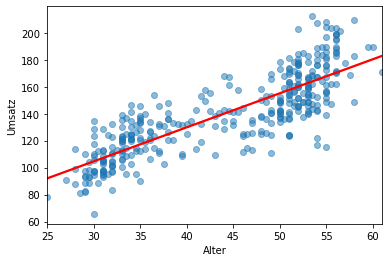

In [38]:

sns.regplot(x="Alter", y="Umsatz", data=tmp, ci=True, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})

In [13]:
sns.regplot(data=df.groupby("Datum"), x="Alter", y="Umsatz")

AttributeError: 'SeriesGroupBy' object has no attribute 'shape'

In [10]:
smf.ols("Umsatz ~ Alter", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Umsatz   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     7512.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:28:06   Log-Likelihood:                -57228.
No. Observations:               10000   AIC:                         1.145e+05
Df Residuals:                    9998   BIC:                         1.145e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.3619      2.275    -20.375      0.000     -50.822     -41.902
Alter          4.2109      0.049     86.673      0.000       4.116       4.306
==============================================================================
Omnibus:                     1587.796   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3508.686
Skew:                           0.932   Prob(JB):                         0.00
Kurtosis:                       5.224   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Altergruppe', ylabel='Umsatz'>

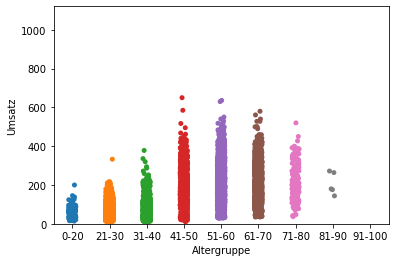

In [42]:
sns.histplot(data=aaaadf, x="Alter")

# create a new column with age groups (10-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, 91-100)
df["Altergruppe"] = pd.cut(df["Alter"], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"])
sns.stripplot(data=df, x="Altergruppe", y="Umsatz", jitter=0.1)

In [11]:
df.groupby("Zahlungsmethode").agg({"Umsatz": "mean"})

,Umsatz
Zahlungsmethode,
Bar,141.536187
EC-Karte,139.903873
Kreditkarte,138.914361


In [43]:
import statsmodels.formula.api as smf

In [53]:
smf.ols("Umsatz ~ Zahlungsmethode + C(Monat)*Altergruppe", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Umsatz   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:28:25   Log-Likelihood:                -56616.
No. Observations:               10000   AIC:                         1.134e+05
Df Residuals:                    9909   BIC:                         1.141e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               56.8205     31.280      1.817      0.069      -4.494     118.135
Zahlungsmethode[T.EC-Karte]             -1.0808      1.705     -0.634      0.526      -4.423       2.261
Zahlungsmethode[T.Kreditkarte]          -0.0610      1.731     -0.035      0.972      -3.454       3.332
C(Monat)[T.2]                            4.1140     37.717      0.109      0.913     -69.820      78.048
C(Monat)[T.3]                            4.4802     40.942      0.109      0.913     -75.774      84.734
C(Monat)[T.4]                            2.2022     36.106      0.061      0.951     -68.573      72.977
C(Monat)[T.5]                            1.9866     36.425      0.055      0.957     -69.415      73.388
C(Monat)[T.6]                            7.8485     37.713      0.208      0.835     -66.077      81.774
C(Monat)[T.7]                            2.1322     36.425      0.059      0.953     -69.268      73.533
C(Monat)[T.8]                           11.4310     36.795      0.311      0.756     -60.695      83.557
C(Monat)[T.9]                           16.0055     37.711      0.424      0.671     -57.916      89.927
C(Monat)[T.10]                           1.9039     35.346      0.054      0.957     -67.382      71.190
C(Monat)[T.11]                          24.1944     40.939      0.591      0.555     -56.055     104.443
C(Monat)[T.12]                          -2.6310     37.710     -0.070      0.944     -76.550      71.288
Altergruppe[T.21-30]                     2.3360     31.752      0.074      0.941     -59.904      64.576
Altergruppe[T.31-40]                     9.8939     32.080      0.308      0.758     -52.990      72.777
Altergruppe[T.41-50]                   136.2803     32.017      4.256      0.000      73.520     199.040
Altergruppe[T.51-60]                   157.0221     31.531      4.980      0.000      95.214     218.830
Altergruppe[T.61-70]                   143.6361     31.729      4.527      0.000      81.441     205.832
Altergruppe[T.71-80]                   140.1419     34.039      4.117      0.000      73.419     206.865
Altergruppe[T.81-90]                   117.2178     27.260      4.300      0.000      63.782     170.654
Altergruppe[T.91-100]                  7.67e-14   1.35e-13      0.566      0.571   -1.89e-13    3.42e-13
C(Monat)[T.2]:Altergruppe[T.21-30]       6.7029     38.510      0.174      0.862     -68.785      82.191
C(Monat)[T.3]:Altergruppe[T.21-30]      -3.6891     41.661     -0.089      0.929     -85.354      77.975
C(Monat)[T.4]:Altergruppe[T.21-30]       1.5276     36.905      0.041      0.967     -70.814      73.869
C(Monat)[T.5]:Altergruppe[T.21-30]       4.9490     37.192      0.133      0.894     -67.955      77.853
C(Monat)[T.6]:Altergruppe[T.21-30]    

In [30]:
sns.stripplot(df, x="Zahlungsmethode", y="Umsatz", alpha=0.3)

/Users/felix/opt/anaconda3/envs/mlbasic/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'Umsatz'

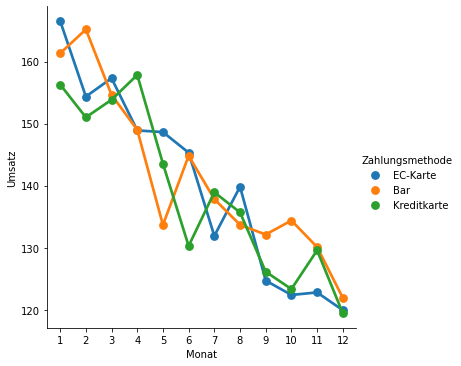

In [33]:
sns.catplot(data=df, x="Monat", y="Umsatz", kind="point", hue="Zahlungsmethode", ci=None)

In [9]:
# Check if average age of customes has changed over time (groupby Datum)
df.groupby("Monat").agg({"Alter": "mean"})

,Alter
Monat,
1,48.631887
2,47.513690
3,47.354460
4,46.174970
5,45.522248
6,44.457978
7,43.024561
8,43.577830
9,42.141304


<AxesSubplot:xlabel='Alter', ylabel='Count'>

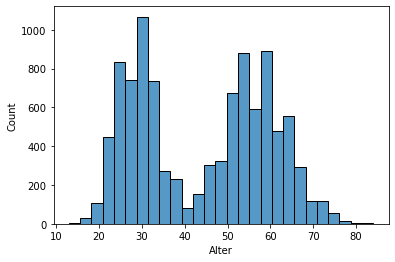

In [63]:
sns.histplot(data=df, x="Alter")

<AxesSubplot:xlabel='Monat'>

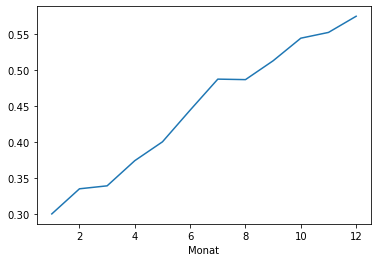

In [64]:
df = df.assign(Type=lambda x: np.where(x["Alter"] < 40, "Young", "Old"))

# Check if % of "Young" has changed over time
df.groupby("Monat")["Type"].value_counts(normalize=True).unstack()["Young"].plot()#.plot()

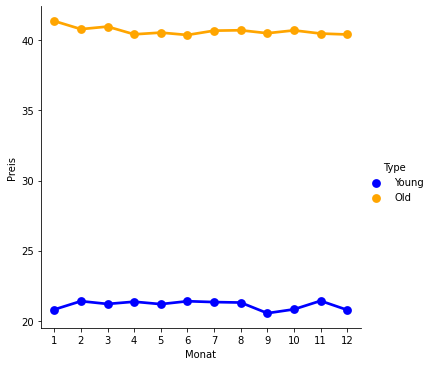

In [65]:

sns.catplot(x="Monat", y="Preis", data=df,  kind="point", palette={"Young": "blue", "Old": "orange"}, hue="Type", ci=None)

<AxesSubplot:xlabel='Datum'>

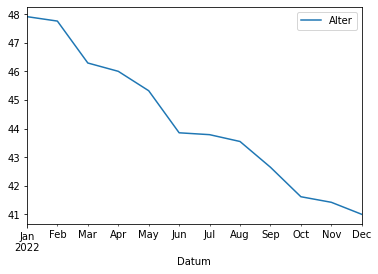

In [69]:
df.groupby(pd.Grouper(key="Datum", freq="M")).agg({"Alter": "mean"}).plot()

<AxesSubplot:xlabel='Alter'>

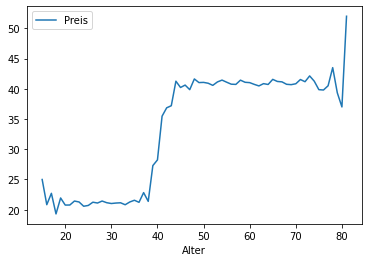

In [29]:
df.groupby(["Altera"]).agg({"Preis": "mean"}).plot()

## Prepare construction data

# import data analysis packages


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from faker import Faker
from datetime import datetime as dt

# Set max columns to 100 for pandas
pd.set_option("display.max_columns", 100)


In [121]:
def fake_project_title():
    project_titles = fake.city() + "_" + fake.postcode() + "_" + fake.building_number()
    return project_titles 


def fake_project_id():
    id = np.random.choice([s.upper() for s in list("abcdefghijklmnopqrstuvwxyz")]+list(range(1,30)), 3)
    return "".join(id)


def add_x_years(d, years):
    try:
        return d.replace(year=d.year + years)
    except ValueError:
        return d + (dt(d.year + years, 1, 1) - dt(d.year, 1, 1))



In [122]:
fake_project_id()

'M18P'

In [205]:
# Load dataset

fpath = "../_data/Construction2.xlsx"
df = pd.read_excel(fpath, sheet_name="Data for Regression", engine="openpyxl")

In [206]:
# Initialize Faker library
Faker.seed(132)
fake = Faker(locale="de_DE")


# Create new columns with fake data
mapper_project_title = {old: fake_project_title() for old in df["Project Title"].unique()}
mapper_project_id = {old: fake_project_id() for old in df["Project No. "].unique()}
mapper_project_team = {old: f"Team {str(no + 1).zfill(2)}" for no, old in enumerate(df["Construction Unit"].unique())}
df = (df.assign(Projektname=lambda x: x["Project Title"].map(mapper_project_title), 
               Projekt_ID=lambda x: x["Project No. "].map(mapper_project_id),
               Project_team = lambda x: x["Construction Unit"].map(mapper_project_team),
               Plan_Pläne_fertig = lambda x: x["Design Schedule and Completion Date"].apply(lambda x: add_x_years(x, 10)),
               Ist_Pläne_fertig = lambda x: x["Design Actual Completion Date "].apply(lambda x: add_x_years(x, 10)),
               Projekt_Beginn = lambda x: x["Title Request "].apply(lambda x: add_x_years(x, 10)),
               Bau_Beginn = lambda x: x["Registration Approved; Pending Order-to- Work Date"].apply(lambda x: add_x_years(x, 10)),
               Plan_Bau_fertig = lambda x: x["Scheduled Completion Date "].apply(lambda x: add_x_years(x, 10)),       
               Ist_Bau_fertig = lambda x: x["Final Inspection "].apply(lambda x: add_x_years(x, 10)),
               )

        .drop(columns=["Project Title", "Project No. ", "Construction Unit", 
                      "Design Schedule and Completion Date", "Design Actual Completion Date ", "Title Request ", 
                      "Registration Approved; Pending Order-to- Work Date", "Scheduled Completion Date ", "Final Inspection "])
        .rename(columns={"Construction Registered Amount ": "Budgetierte Ausgaben", "Total Budget": "Ist Ausgaben"})
        )

               
               
df.head()

,Budgetierte Ausgaben,Ist Ausgaben,Status,Coded Unit,ln(cost),Electrical,Tree,Landscape,Plumbing,Park,Station,Playground,Architecture,Bronx Team,Brooklyn Team,Construction Project Manager,Construction Resources,Croton Unit,Engineering,Environmental Control Unit,Manhattan Team,Queens Team,Requirements Contract Unit,Staten Island Team,Technical Services (Randalls Island),Tree Unit,Days Late,Cost Escalations,Projektname,Projekt_ID,Project_team,Plan_Pläne_fertig,Ist_Pläne_fertig,Projekt_Beginn,Bau_Beginn,Plan_Bau_fertig,Ist_Bau_fertig
0,572915.0,710000.0,GI,Brooklyn Team,13.258493,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.239276,Düren_02041_374,4QS,Team 01,2010-12-15,2011-02-22,2010-09-08,2011-06-18,2011-12-14,2012-01-28
1,666792.0,933000.0,GI,Brooklyn Team,13.410233,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.0,0.399237,Meppen_96379_6,21UW,Team 01,2010-02-08,2010-03-06,2009-06-16,2010-08-28,2011-02-23,2011-10-24
2,499619.0,650000.0,GI,Brooklyn Team,13.121601,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.300991,Eutin_80958_925,TV29,Team 01,2011-03-15,2011-04-11,2010-11-20,2011-09-10,2012-06-06,2012-06-04
3,915549.0,1186000.0,GI,Construction Project Manager,13.727279,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,349.0,0.295398,Güstrow_52073_723,N103,Team 02,2009-03-31,2009-04-19,2008-08-10,2009-08-18,2010-05-23,2011-05-07
4,602129.0,813000.0,GI,Brooklyn Team,13.308227,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.350209,Herford_61159_472,2323H,Team 01,2011-12-28,2012-03-01,2011-08-17,2012-10-15,2013-10-09,2013-10-21


In [207]:
# columns Electrical, Tree, Landscape, Plumbing, Park, Station, Playground into one column "Bauart"
# Then translate "Bauart" into German   
# drop columns Electrical, Tree, Landscape, Plumbing, Park, Station, Playground
df = df.assign(Bauart=lambda x: x[["Electrical", "Tree", "Landscape", "Plumbing", "Park", "Station", "Playground"]].idxmax(axis=1))
df["Bauart"] = df["Bauart"].replace({"Electrical": "Elektroarbeiten", "Tree": "Baumbestand", "Landscape": "Landschaftsbau", "Plumbing": "Sanitär", "Park": "Stadtpark", "Station": "Ubahn", "Playground": "Spielplatz"})
df = df.drop(columns=["Electrical", "Tree", "Landscape", "Plumbing", "Park", "Station", "Playground"])

# Drop columns Status, Coded Unit, ln(costs), Architecture, Bronx Team, Brooklyn Team,, Construction Project Manager, Construction Resources, 
# Croton Unit, Engineering, Environmental Control Unit, Manhatten Team, Queens Team, Requirements Contract Unit, Staten Island Team, Technical Services (Randalls Islands), Tree Unit, Days Late, Cost Escalation
#df = df.drop(columns=["Status", "Coded Unit", "ln(costs)", "Architecture", "Bronx Team", "Brooklyn Team", "Construction Project Manager", "Construction Resources", "Croton Unit", "Engineering", "Environmental Control Unit", "Manhatten Team", "Queens Team", "Requirements Contract Unit", "Staten Island Team", "Technical Services (Randalls Islands)", "Tree Unit", "Days Late", "Cost Escalation"])
df.head()

,Budgetierte Ausgaben,Ist Ausgaben,Status,Coded Unit,ln(cost),Architecture,Bronx Team,Brooklyn Team,Construction Project Manager,Construction Resources,Croton Unit,Engineering,Environmental Control Unit,Manhattan Team,Queens Team,Requirements Contract Unit,Staten Island Team,Technical Services (Randalls Island),Tree Unit,Days Late,Cost Escalations,Projektname,Projekt_ID,Project_team,Plan_Pläne_fertig,Ist_Pläne_fertig,Projekt_Beginn,Bau_Beginn,Plan_Bau_fertig,Ist_Bau_fertig,Bauart
0,572915.0,710000.0,GI,Brooklyn Team,13.258493,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.239276,Düren_02041_374,4QS,Team 01,2010-12-15,2011-02-22,2010-09-08,2011-06-18,2011-12-14,2012-01-28,Stadtpark
1,666792.0,933000.0,GI,Brooklyn Team,13.410233,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.0,0.399237,Meppen_96379_6,21UW,Team 01,2010-02-08,2010-03-06,2009-06-16,2010-08-28,2011-02-23,2011-10-24,Stadtpark
2,499619.0,650000.0,GI,Brooklyn Team,13.121601,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.300991,Eutin_80958_925,TV29,Team 01,2011-03-15,2011-04-11,2010-11-20,2011-09-10,2012-06-06,2012-06-04,Spielplatz
3,915549.0,1186000.0,GI,Construction Project Manager,13.727279,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,349.0,0.295398,Güstrow_52073_723,N103,Team 02,2009-03-31,2009-04-19,2008-08-10,2009-08-18,2010-05-23,2011-05-07,Spielplatz
4,602129.0,813000.0,GI,Brooklyn Team,13.308227,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.350209,Herford_61159_472,2323H,Team 01,2011-12-28,2012-03-01,2011-08-17,2012-10-15,2013-10-09,2013-10-21,Stadtpark


In [208]:
df = df.iloc[:, [0,1,21,22,23,24, 25, 26, 27, 28, 29, 30]]
df.head()

,Budgetierte Ausgaben,Ist Ausgaben,Projektname,Projekt_ID,Project_team,Plan_Pläne_fertig,Ist_Pläne_fertig,Projekt_Beginn,Bau_Beginn,Plan_Bau_fertig,Ist_Bau_fertig,Bauart
0,572915.0,710000.0,Düren_02041_374,4QS,Team 01,2010-12-15,2011-02-22,2010-09-08,2011-06-18,2011-12-14,2012-01-28,Stadtpark
1,666792.0,933000.0,Meppen_96379_6,21UW,Team 01,2010-02-08,2010-03-06,2009-06-16,2010-08-28,2011-02-23,2011-10-24,Stadtpark
2,499619.0,650000.0,Eutin_80958_925,TV29,Team 01,2011-03-15,2011-04-11,2010-11-20,2011-09-10,2012-06-06,2012-06-04,Spielplatz
3,915549.0,1186000.0,Güstrow_52073_723,N103,Team 02,2009-03-31,2009-04-19,2008-08-10,2009-08-18,2010-05-23,2011-05-07,Spielplatz
4,602129.0,813000.0,Herford_61159_472,2323H,Team 01,2011-12-28,2012-03-01,2011-08-17,2012-10-15,2013-10-09,2013-10-21,Stadtpark


In [200]:
df = (df.assign(Kostenabweichung = lambda x: (x["Ist Ausgaben"] - x["Budgetierte Ausgaben"]) / x["Budgetierte Ausgaben"] * 100))

In [204]:
smf.ols("Kostenabweichung ~ C(Bauart) + C(Project_team)", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Kostenabweichung   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.301
Date:                Mon, 30 Jan 2023   Prob (F-statistic):             0.0926
Time:                        15:11:38   Log-Likelihood:                -10975.
No. Observations:                1790   AIC:                         2.204e+04
Df Residuals:                    1746   BIC:                         2.228e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       45.3581     21.682      2.092      0.037       2.832      87.884
C(Bauart)[T.Elektroarbeiten]     6.3600     20.481      0.311      0.756     -33.810      46.530
C(Bauart)[T.Landschaftsbau]     13.6051     25.262      0.539      0.590     -35.943      63.153
C(Bauart)[T.Sanitär]           -42.5841     23.743     -1.794      0.073     -89.153       3.984
C(Bauart)[T.Spielplatz]        -13.2541     21.908     -0.605      0.545     -56.222      29.714
C(Bauart)[T.Stadtpark]           4.9831     20.985      0.237      0.812     -36.175      46.141
C(Bauart)[T.Ubahn]              22.3416     29.477      0.758      0.449     -35.471      80.155
C(Project_team)[T.Team 02]      -1.8330     11.031     -0.166      0.868     -23.469      19.803
C(Project_team)[T.Team 03]      -7.7022     13.863     -0.556      0.579     -34.892      19.488
C(Project_team)[T.Team 04]     -20.3618     20.943     -0.972      0.331     -61.437      20.714
C(Project_team)[T.Team 05]     -21.4075     80.274     -0.267      0.790    -178.852     136.037
C(Project_team)[T.Team 06]     -33.9808     65.661     -0.518      0.605    -162.763      94.802
C(Project_team)[T.Team 07]     -50.3412    113.054     -0.445      0.656    -272.077     171.395
C(Project_team)[T.Team 08]      24.9742     15.790      1.582      0.114      -5.996      55.944
C(Project_team)[T.Team 09]      26.9338    113.054      0.238      0.812    -194.802     248.670
C(Project_team)[T.Team 10]     -14.6046     51.329     -0.285      0.776    -115.278      86.069
C(Project_team)[T.Team 11]      -1.4806    113.105     -0.013      0.990    -223.317     220.356
C(Project_team)[T.Team 12]       6.1941     65.785      0.094      0.925    -122.832     135.220
C(Project_team)[T.Team 13]     -27.6379     22.559     -1.225      0.221     -71.884      16.608
C(Project_team)[T.Team 14]     -19.6843     11.862     -1.659      0.097     -42.950       3.582
C(Project_team)[T.Team 15]      14.2312     24.984      0.570      0.569     -34.771      63.234
C(Project_team)[T.Team 16]     -17.0774     43.693     -0.391      0.696    -102.774      68.619
C(Project_team)[T.Team 17]       0.0971     12.076      0.008      0.994     -23.587      23.781
C(Project_team)[T.Team 18]       3.7492     40.979      0.091      0.927     -76.623      84.122
C(Project_team)[T.Team 19]     -11.9687    113.105     -0.106      0.916    -233.805     209.868
C(Project_team)[T.Team 20]      24.4546    113.105      0.216      0.829    -197.382     246.291
C(Project_team)[T.Team 21]       1.0427    113.105      0.009      0.993    -220.794     222.879
C(Project_team)[T.Team 22]      20.6108     11.887      1.734      0.083      -2.703      43.925
C(Project_team)[T.Team 23]     -29.7695     51.152     -0.582      0.561    

## Simulation - Bau GmbH

In Anlehnung an New York Construction Case

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from faker import Faker
from datetime import datetime as dt
import datetime

# Set max columns to 100 for pandas
pd.set_option("display.max_columns", 100)

### Modellierung "Ostereier"

__Verzögerung__:
- Team 1: sehr gut bei Elektroarbeiten, schlecht bei Stadtpark und Ubahn
- Team 3: sehr gut bei Stadtpark, sehr schlecht bei Elektroarbeiten und Ubahn
- Team 4: sehr gut bei Ubahn 

__Kosten__:
- alle Team haben Kostenüberschreitung im Schnitt
- Team 2: überall deutliche Kostenüberschreitung überall
- Team 1: deutliche Kostenüberschreitung bei Elektroarbeiten und Stadtpark
- 

In [329]:
faker = Faker(locale="de_DE")
bauarten = ["Elektroarbeiten", "Baumbestand", "Landschaftsbau", "Straßenbau", "Stadtpark", "Ubahn", "Spielplatz"]
# Anteil der Bauarten (gesamt = 100%)
dist_bauarten = [0.2, 0.2, 0.2, 0.1, 0.15, 0.1, 0.05]
teams = ["Team 1", "Team 2", "Team 3", "Team 4"]
dist_team = [0.25, 0.25, 0.25, 0.25]
team2id = {team: no for no, team in enumerate(teams)}

{'Team 1': 0, 'Team 2': 1, 'Team 3': 2, 'Team 4': 3}

In [371]:



### Dauer der Bauarbeiten
mean_duration = {"Elektroarbeiten": 50, "Baumbestand": 10, "Landschaftsbau": 20, "Straßenbau": 80, "Stadtpark": 45, "Ubahn": 128, "Spielplatz": 43}


# Durschnittliche Verzögerung der Bauarbeiten je Team
mean_verzögerung_by_team = {"Elektroarbeiten": [-5, 1, 30, 2], 
                            "Baumbestand": [2,3,4,1], 
                            "Landschaftsbau": [1,3,4,2], 
                            "Straßenbau": [2, 3, 1,50], 
                            "Stadtpark": [50, 0, -15, 0], 
                            "Ubahn": [110, 0, 50, -25], 
                            "Spielplatz": [-1, 20, 1, 4]}


# Kosten je Bauart
mean_costs = {"Elektroarbeiten": 100_000, "Baumbestand": 50_000, "Landschaftsbau": 80_000, "Straßenbau": 200_000, "Stadtpark": 150_000, "Ubahn": 500_000, "Spielplatz": 100_000}

# Durschnittliche Kostenabweichung je Bauart und Team
mean_costs_deviation = {"Elektroarbeiten": [0.1, 0.2, 0.3, 0.4], 
                        "Baumbestand": [0.1, 0.2, 0.3, 0.4], 
                        "Landschaftsbau": [0.1, 0.2, 0.3, 0.4], 
                        "Straßenbau": [0.1, 0.2, 0.3, 0.4], 
                        "Stadtpark": [0.1, 0.2, 0.3, 0.4], 
                        "Ubahn": [0.1, 0.2, 0.3, 0.4], 
                        "Spielplatz": [0.1, 0.2, 0.3, 0.4]}


n_projects = 10_000
data = {"Bauart": [], "Projekt_ID": [], "Projektname": [], "Projekt_Beginn": [], "Plan_Bau_fertig": [], "Ist_Bau_fertig": [], "Plan_Kosten": [], "Ist_Kosten":[], "Project_team": []}
counter = 0
for p in range(n_projects):
    # Project ID fake
    project_id = faker.bothify(text="P-###")

    # Choose Bauart
    art = np.random.choice(bauarten, p=dist_bauarten)

    # Sample a start date
    date_start = faker.date_between(start_date="-10y", end_date="-1y", )

    # Sample a planned duration
    duration = np.random.normal(loc=mean_duration[art], scale=mean_duration[art] / 2 + 2)

    if duration < 0:
        duration = mean_duration[art]

    # Sample a planned end date
    date_plan_end = date_start + datetime.timedelta(days=duration)

    # Sample a team
    team = np.random.choice(teams, p=dist_team)
    teamid = team2id[team]

    # Sample a delay
    delay = np.random.normal(loc=mean_verzögerung_by_team[art][teamid], scale=abs(mean_verzögerung_by_team[art][teamid]) / 3 + 1)
    date_act_end = date_plan_end + datetime.timedelta(days=delay)

    if date_act_end < date_start:
        counter += 1
        date_act_end = date_plan_end + datetime.timedelta(days=np.random.normal(4))


    # Gather data
    data["Bauart"].append(art)
    data["Projekt_ID"].append(project_id)
    data["Projektname"].append(art + " // " + faker.street_name())
    data["Projekt_Beginn"].append(date_start)
    data["Plan_Bau_fertig"].append(date_plan_end)
    data["Ist_Bau_fertig"].append(date_act_end)
    data["Project_team"].append(team)

df = pd.DataFrame(data)
df.tail(), counter


(               Bauart Projekt_ID                              Projektname  \
 9995       Spielplatz      P-574        Spielplatz // Lydia-Carsten-Gasse   
 9996  Elektroarbeiten      P-420            Elektroarbeiten // Budiggasse   
 9997  Elektroarbeiten      P-506     Elektroarbeiten // Margita-Heß-Platz   
 9998            Ubahn      P-768            Ubahn // Elsbeth-Kobelt-Allee   
 9999  Elektroarbeiten      P-722  Elektroarbeiten // Martina-Barkholz-Weg   
 
      Projekt_Beginn Plan_Bau_fertig Ist_Bau_fertig Project_team  
 9995     2017-05-23      2017-06-17     2017-07-11       Team 2  
 9996     2018-01-20      2018-04-08     2018-04-07       Team 2  
 9997     2015-03-29      2015-05-01     2015-05-23       Team 3  
 9998     2017-04-10      2017-08-16     2017-10-25       Team 1  
 9999     2016-02-14      2016-04-12     2016-04-11       Team 2  ,
 55)

In [367]:
df = (df
.assign(Dauer_ist = lambda x: (x["Ist_Bau_fertig"] - x["Projekt_Beginn"]).dt.days,
        Dauer_plan = lambda x: (x["Plan_Bau_fertig"] - x["Projekt_Beginn"]).dt.days,
        Verzögerung = lambda x: x["Dauer_ist"] - x["Dauer_plan"],
        )
)
df.head()

,Bauart,Projekt_ID,Projektname,Projekt_Beginn,Plan_Bau_fertig,Ist_Bau_fertig,Project_team,Dauer_ist,Dauer_plan,Verzögerung
0,Stadtpark,P-670,Stadtpark // Heßplatz,2019-08-14,2019-09-30,2019-09-28,Team 4,45,47,-2
1,Landschaftsbau,P-961,Landschaftsbau // Jäkelweg,2019-10-18,2019-11-04,2019-10-31,Team 3,13,17,-4
2,Baumbestand,P-095,Baumbestand // Senol-Schmiedt-Gasse,2017-01-16,2017-02-04,2017-02-09,Team 3,24,19,5
3,Spielplatz,P-350,Spielplatz // Pedro-Scheuermann-Platz,2015-07-26,2015-08-11,2015-09-01,Team 2,37,16,21
4,Stadtpark,P-068,Stadtpark // Achim-Heser-Gasse,2018-08-19,2018-10-13,2018-10-14,Team 2,56,55,1


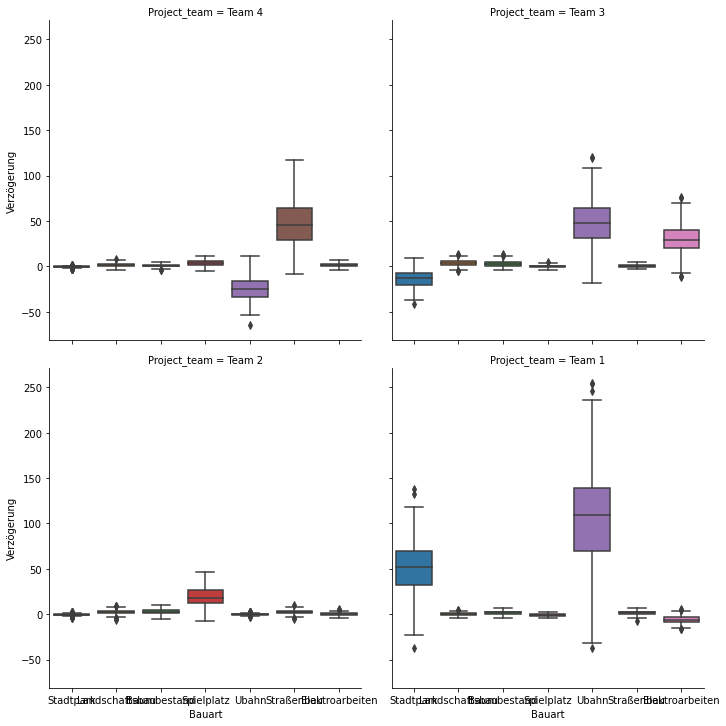

In [368]:
sns.catplot(x="Bauart", y="Verzögerung", col="Project_team", col_wrap=2, data=df, kind="box", ci=False)

In [315]:
# Generate fake project names in German
def generate_project_name():
    return 

In [316]:
generate_project_name()

'Löchelstraße'

In [302]:
df = (df
        .assign(Duration=lambda x: x["Plan_Bau_fertig"] - x["Projekt_Beginn"],)
        # timedelta to int
        .assign(Duration=lambda x: x["Duration"].apply(lambda x: x.days))
)


df.groupby("Bauart").agg({"Duration": "mean"})

,Duration
Bauart,
Baumbestand,10.095238
Elektroarbeiten,56.000000
Landschaftsbau,18.684211
Spielplatz,43.750000
Stadtpark,52.833333
Straße,71.214286
Ubahn,125.923077


In [ ]:



n = 1000
for bauart in bauarten:
    for team in teams:
        # Generate random numbers from normal distribution
        mu = mean_verzögerung_by_team[bauart][int(team[-1]) - 1]
        sigma = 10
        x = stats.poisson(mu=mu, loc=0).rvs(1)
        # Create dataframe
        df = pd.DataFrame({"Verzögerung": x, "Bauart": bauart, "Team": team})
        # Save to csv
        #df.to_csv(f"../_data/verzögerung_{bauart}_{team}.csv", index=False)


In [269]:
df.head()

,Verzögerung,Bauart,Team
0,0.122569,Spielplatz,Team 4
1,9.825773,Spielplatz,Team 4
2,-24.849250,Spielplatz,Team 4
3,-3.494421,Spielplatz,Team 4
4,-5.419908,Spielplatz,Team 4


In [ ]:
anteil_bauart = [0.1, 0.2, 0.3, 0.1, 0.1, 0.1, 0.1]

verzögerung_mean_bauart = {"Elektroarbeiten": 10, "Baumbestand": 233, "Landschaftsbau": 5, 
                          "Sanitär": 40, "Stadtpark": 50, "Ubahn": 60, "Spielplatz": 100}
mehrkosten_mean_bauart = {"Elektroarbeiten": 10, "Baumbestand": 0, "Landschaftsbau": 5, "Sanitär": 40, "Stadtpark": 50, "Ubahn": 60, "Spielplatz": 70}

n = 1000

data = {"Bauart": [], "Verzögerung": [], "Mehrkosten": []}
for i in range(n):
    bauart = np.random.choice(bauarten, p=anteil_bauart)
    verzögerung = stats.poisson(verzögerung_mean_bauart[bauart]).rvs()
    mehrkosten = stats.norm(mehrkosten_mean_bauart[bauart], 10).rvs()
    data["Bauart"].append(bauart)
    data["Verzögerung"].append(verzögerung)
    data["Mehrkosten"].append(mehrkosten)



df = pd.DataFrame(data)
df.head()



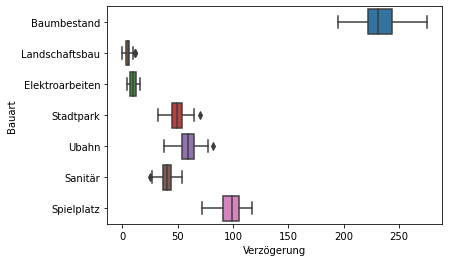

In [265]:
ax = sns.boxplot(data=df,y="Bauart", x="Verzögerung")
# rotate x-axis labels
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

<AxesSubplot:xlabel='Mehrkosten', ylabel='Count'>

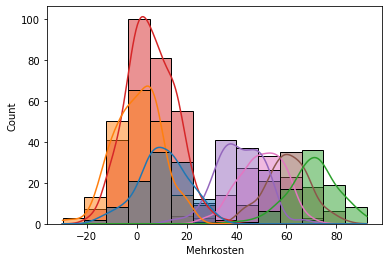

In [254]:
sns.histplot(data=df, x="Mehrkosten" , hue="Bauart",kde=True, legend=False)